In [1]:
import pandas as pd
import math
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
from statsmodels.graphics.tsaplots import plot_acf
from scipy.interpolate import interp1d

In [2]:
def makeIntoCSV(fileLocation: str, filename: str):
    # Read the text file
    with open(fileLocation, 'r') as file:
        lines = file.readlines()

    # Remove the first two lines
    lines = lines[2:]

    # Join the remaining lines
    data = "\n".join(lines)

    # Create a DataFrame from the text
    df = pd.read_csv(StringIO(data), sep=r'\s+')

    # Save the DataFrame to a CSV file
    df.to_csv(filename, index=False)
    return df

In [3]:
# make dataframe

vortex_10m_1st = makeIntoCSV(r"vortex.serie.733611.6m 10m UTC+08.0 CFSR.txt", "vortex_10m.csv")

vortex_50m_1st = makeIntoCSV(r"vortex.serie.733611.6m 50m UTC+08.0 CFSR.txt", "vortex_50m.csv")

vortex_100m_1st = makeIntoCSV(r"vortex.serie.733611.6m 100m UTC+08.0 CFSR.txt", "vortex_100m.csv")

vortex_10m_1st

,YYYYMMDD,HHMM,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%),RMOL(1/m)
0,20200101,800,4.3,280,25.9,1.14,976.4,-999.0,93.1,-0.0035
1,20200101,900,4.4,278,26.4,1.14,976.2,-999.0,88.6,-0.0053
2,20200101,1000,4.4,277,26.8,1.13,976.0,-999.0,87.7,-0.0068
3,20200101,1100,4.2,276,27.0,1.13,975.7,-999.0,84.8,-0.0080
4,20200101,1200,4.1,276,27.2,1.13,975.5,-999.0,82.9,-0.0090
...,...,...,...,...,...,...,...,...,...,...
4387,20200702,300,3.6,104,23.8,1.14,974.7,-999.0,92.0,0.0034
4388,20200702,400,3.6,106,23.8,1.14,974.8,-999.0,92.1,0.0035
4389,20200702,500,3.6,107,23.8,1.14,974.9,-999.0,91.8,0.0035
4390,20200702,600,3.8,106,23.8,1.14,975.0,-999.0,91.3,0.0031


In [4]:
# make dataframe 2nd period

vortex_10m_2nd = makeIntoCSV(r"vortex.serie.738279.6m 10m UTC+08.0 CFSR.txt", "vortex_10m_2nd.csv")

vortex_50m_2nd = makeIntoCSV(r"vortex.serie.738279.6m 50m UTC+08.0 CFSR.txt", "vortex_50m_2nd.csv")

vortex_100m_2nd = makeIntoCSV(r"vortex.serie.738279.6m 100m UTC+08.0 CFSR.txt", "vortex_100m_2nd.csv")

In [5]:
vortex_10m_1st = vortex_10m_1st.drop(index=(range(4368, 4392)))
vortex_50m_1st = vortex_50m_1st.drop(index=(range(4368, 4392)))
vortex_100m_1st = vortex_100m_1st.drop(index=(range(4368, 4392)))

In [6]:
vortex_10m = pd.concat([vortex_10m_1st, vortex_10m_2nd])
vortex_50m = pd.concat([vortex_50m_1st, vortex_50m_2nd])
vortex_100m = pd.concat([vortex_100m_1st, vortex_100m_2nd])

In [7]:
vortex_10m['HHMM'] = vortex_10m['HHMM']//100
vortex_50m['HHMM'] = vortex_50m['HHMM']//100
vortex_100m['HHMM'] = vortex_100m['HHMM']//100


In [8]:
print(vortex_50m)

      YYYYMMDD  HHMM  M(m/s)  D(deg)  T(C)  De(k/m3)  PRE(hPa)  RiNumber  \
0     20200101     8     5.9     281  25.1      1.14     971.7     -0.49   
1     20200101     9     5.9     279  25.6      1.13     971.5     -0.91   
2     20200101    10     5.8     278  25.8      1.13     971.3     -1.27   
3     20200101    11     5.5     278  26.1      1.13     971.0     -1.67   
4     20200101    12     5.3     277  26.2      1.13     970.8     -1.91   
...        ...   ...     ...     ...   ...       ...       ...       ...   
4435  20210102     3     6.9     283  24.0      1.14     968.1      0.09   
4436  20210102     4     7.0     283  24.0      1.14     968.4      0.10   
4437  20210102     5     7.1     284  23.9      1.14     968.6      0.11   
4438  20210102     6     7.2     284  23.9      1.14     968.8      0.12   
4439  20210102     7     7.0     285  24.0      1.14     969.0      0.02   

      RH(%)  RMOL(1/m)  
0      94.7    -0.0035  
1      90.3    -0.0053  
2      89.6 

In [9]:
# importing NSRDB data
NSRDB = pd.read_csv(r"data kecepatan wind di pulau selayar.csv")

NSRDB = NSRDB.drop(['wind speed_10 m', 'wind direction_10 m'], axis=1)

NSRDB = NSRDB.set_index(['timestamp', 'hour'])

NSRDB= NSRDB.rename_axis(['YYYYMMDD','HHMM'])

NSRDB = NSRDB.rename(columns={"wind speed": "M(m/s)_2m", 'wind direction': 'D(deg)_2m', 'friction velocity': 'u*_2m'})

print(NSRDB)

               M(m/s)_2m  D(deg)_2m     u*_2m
YYYYMMDD HHMM                                
20200101 0           4.1      281.0  5.700738
         1           4.1      265.0  5.700738
         2           4.2      257.0  5.839780
         3           4.3      262.0  5.978822
         4           4.5      266.0  6.256907
...                  ...        ...       ...
20201231 19          1.0      227.0  1.390424
         20          1.0      210.0  1.390424
         21          1.1      199.0  1.529466
         22          1.2      201.0  1.668509
         23          1.5      209.0  2.085636

[8784 rows x 3 columns]


In [10]:
vortex_100m = vortex_100m.set_index(['YYYYMMDD', 'HHMM'])
vortex_50m = vortex_50m.set_index(['YYYYMMDD', 'HHMM'])
vortex_10m = vortex_10m.set_index(['YYYYMMDD', 'HHMM'])

vortex_50m

M(m/s)  D(deg)  T(C)  De(k/m3)  PRE(hPa)  RiNumber  RH(%)  \
YYYYMMDD HHMM                                                              
20200101 8        5.9     281  25.1      1.14     971.7     -0.49   94.7   
         9        5.9     279  25.6      1.13     971.5     -0.91   90.3   
         10       5.8     278  25.8      1.13     971.3     -1.27   89.6   
         11       5.5     278  26.1      1.13     971.0     -1.67   86.3   
         12       5.3     277  26.2      1.13     970.8     -1.91   84.3   
...               ...     ...   ...       ...       ...       ...    ...   
20210102 3        6.9     283  24.0      1.14     968.1      0.09   98.5   
         4        7.0     283  24.0      1.14     968.4      0.10   98.1   
         5        7.1     284  23.9      1.14     968.6      0.11   97.9   
         6        7.2     284  23.9      1.14     968.8      0.12   97.6   
         7        7.0     285  24.0      1.14     969.0      0.02   97.3   

               RMOL(1/m)  
YYYYMMDD HHMM             
20200101 8       -0.0035  
         9       -0.0053  
         10      -0.0068  
         11      -0.0080  
         12      -0.0090  
...                  ...  
20210102 3        0.0011  
         4        0.0011  
         5        0.0011  
         6        0.0010  
         7       -0.0006  

[8808 rows x 8 columns]

In [11]:
# rename collumns
vortex_100m.columns = [f'{col}_100m' for col in vortex_100m.columns]
vortex_50m.columns = [f'{col}_50m' for col in vortex_50m.columns]
vortex_10m.columns = [f'{col}_10m' for col in vortex_10m.columns]

print(vortex_100m)



               M(m/s)_100m  D(deg)_100m  T(C)_100m  De(k/m3)_100m  \
YYYYMMDD HHMM                                                       
20200101 8             6.4          281       24.5           1.13   
         9             6.2          279       24.9           1.13   
         10            6.1          279       25.2           1.13   
         11            5.8          278       25.4           1.13   
         12            5.5          277       25.6           1.13   
...                    ...          ...        ...            ...   
20210102 3             7.7          282       23.6           1.13   
         4             7.7          282       23.6           1.13   
         5             7.8          283       23.6           1.13   
         6             7.9          283       23.6           1.13   
         7             7.8          284       23.7           1.13   

               PRE(hPa)_100m  RiNumber_100m  RH(%)_100m  RMOL(1/m)_100m  
YYYYMMDD HHMM               

In [12]:
# merge the dataframe
dummy_dataframe = pd.merge(vortex_100m, vortex_50m, left_index=True, right_index=True)
wind_dataframe = pd.merge(dummy_dataframe, vortex_10m, left_index=True, right_index=True )

print(wind_dataframe)

               M(m/s)_100m  D(deg)_100m  T(C)_100m  De(k/m3)_100m  \
YYYYMMDD HHMM                                                       
20200101 8             6.4          281       24.5           1.13   
         9             6.2          279       24.9           1.13   
         10            6.1          279       25.2           1.13   
         11            5.8          278       25.4           1.13   
         12            5.5          277       25.6           1.13   
...                    ...          ...        ...            ...   
20210102 3             7.7          282       23.6           1.13   
         4             7.7          282       23.6           1.13   
         5             7.8          283       23.6           1.13   
         6             7.9          283       23.6           1.13   
         7             7.8          284       23.7           1.13   

               PRE(hPa)_100m  RiNumber_100m  RH(%)_100m  RMOL(1/m)_100m  \
YYYYMMDD HHMM              

In [13]:
# Joining the NSRDB data

coba_dataframe = pd.merge(wind_dataframe, NSRDB, left_index=True, right_index=True)
print(coba_dataframe)

               M(m/s)_100m  D(deg)_100m  T(C)_100m  De(k/m3)_100m  \
YYYYMMDD HHMM                                                       
20200101 8             6.4          281       24.5           1.13   
         9             6.2          279       24.9           1.13   
         10            6.1          279       25.2           1.13   
         11            5.8          278       25.4           1.13   
         12            5.5          277       25.6           1.13   
...                    ...          ...        ...            ...   
20201231 19            1.2          220       24.3           1.13   
         20            2.1          235       24.3           1.13   
         21            2.4          242       24.2           1.13   
         22            2.9          254       24.2           1.13   
         23            3.2          263       24.4           1.13   

               PRE(hPa)_100m  RiNumber_100m  RH(%)_100m  RMOL(1/m)_100m  \
YYYYMMDD HHMM              

In [14]:
# cleaning unwanted data

coba_dataframe = coba_dataframe[coba_dataframe.columns.drop(list(coba_dataframe.filter(regex=r'T(C)*')))]
coba_dataframe = coba_dataframe[coba_dataframe.columns.drop(list(coba_dataframe.filter(regex=r'PRE*')))]
coba_dataframe = coba_dataframe[coba_dataframe.columns.drop(list(coba_dataframe.filter(regex=r'RiNumber*')))]
coba_dataframe = coba_dataframe[coba_dataframe.columns.drop(list(coba_dataframe.filter(regex=r'RH*')))]
coba_dataframe = coba_dataframe[coba_dataframe.columns.drop(list(coba_dataframe.filter(regex=r'RMOL*')))]
coba_dataframe = coba_dataframe[coba_dataframe.columns.drop(list(coba_dataframe.filter(regex=r'De(k/m3)*')))]

print(coba_dataframe)

               M(m/s)_100m  D(deg)_100m  M(m/s)_50m  D(deg)_50m  M(m/s)_10m  \
YYYYMMDD HHMM                                                                 
20200101 8             6.4          281         5.9         281         4.3   
         9             6.2          279         5.9         279         4.4   
         10            6.1          279         5.8         278         4.4   
         11            5.8          278         5.5         278         4.2   
         12            5.5          277         5.3         277         4.1   
...                    ...          ...         ...         ...         ...   
20201231 19            1.2          220         0.8         211         0.4   
         20            2.1          235         1.8         233         0.9   
         21            2.4          242         1.9         237         1.0   
         22            2.9          254         2.4         254         1.2   
         23            3.2          263         2.9 

In [15]:
coba_dataframe.to_csv("wind data at Pulau Selayar.csv")

In [16]:
zo = 1.5 # daerah hutan
k = 0.4 # karman constant
z1 = 2
z2 = 10
z3 = 50
z4 = 100

(200.0, 300.0)

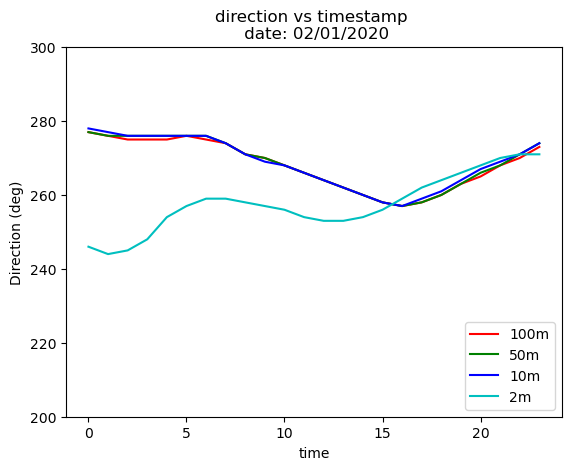

In [17]:
time_20200102_df =coba_dataframe.loc[20200102]
time_20200102_df

plt.plot(time_20200102_df.index, time_20200102_df['D(deg)_100m'], color='r', label='100m')
plt.plot(time_20200102_df.index, time_20200102_df['D(deg)_50m'], color='g', label='50m')
plt.plot(time_20200102_df.index, time_20200102_df['D(deg)_10m'], color='b', label='10m')
plt.plot(time_20200102_df.index, time_20200102_df['D(deg)_2m'], color='c', label='2m')

plt.xlabel("time") 
plt.ylabel("Direction (deg)") 
plt.title("direction vs timestamp \n date: 02/01/2020") 

plt.legend(loc='lower right')
plt.ylim([200, 300])

(200.0, 300.0)

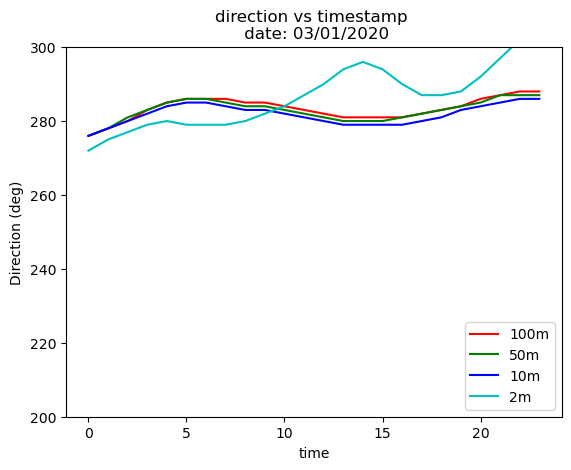

In [18]:
time_20200103_df =coba_dataframe.loc[20200103]
time_20200103_df

plt.plot(time_20200103_df.index, time_20200103_df['D(deg)_100m'], color='r', label='100m')
plt.plot(time_20200103_df.index, time_20200103_df['D(deg)_50m'], color='g', label='50m')
plt.plot(time_20200103_df.index, time_20200103_df['D(deg)_10m'], color='b', label='10m')
plt.plot(time_20200103_df.index, time_20200103_df['D(deg)_2m'], color='c', label='2m')

plt.xlabel("time") 
plt.ylabel("Direction (deg)") 
plt.title("direction vs timestamp \n date: 03/01/2020") 

plt.legend(loc='lower right')
plt.ylim([200, 300])

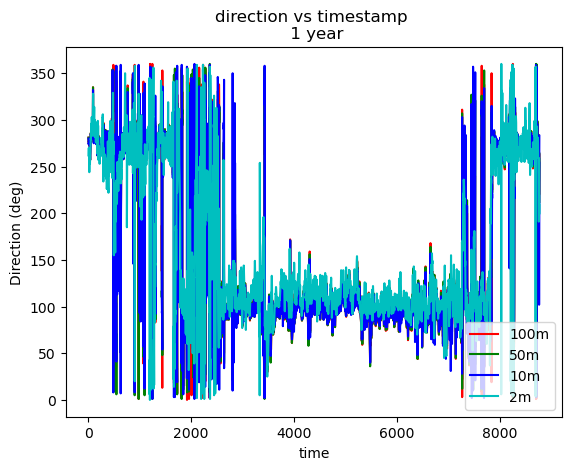

In [19]:
time_df =coba_dataframe

plt.plot(range(0, len(time_df)), time_df['D(deg)_100m'], color='r', label='100m')
plt.plot(range(0, len(time_df)), time_df['D(deg)_50m'], color='g', label='50m')
plt.plot(range(0, len(time_df)), time_df['D(deg)_10m'], color='b', label='10m')
plt.plot(range(0, len(time_df)), time_df['D(deg)_2m'], color='c', label='2m')

plt.xlabel("time") 
plt.ylabel("Direction (deg)") 
plt.title("direction vs timestamp \n 1 year") 

plt.legend(loc='lower right')

In [20]:
# karena faktor kestabilan, digunakan kecepatan pada ketinggian 100 m

coba_dataframe['u_100m'] = coba_dataframe['M(m/s)_100m'] * np.cos(np.deg2rad(coba_dataframe['D(deg)_100m']))
coba_dataframe['v_100m'] = coba_dataframe['M(m/s)_100m'] * np.sin(np.deg2rad(coba_dataframe['D(deg)_100m']))
coba_dataframe['w_100m'] = [0] * len(coba_dataframe.index)

coba_dataframe

M(m/s)_100m  D(deg)_100m  M(m/s)_50m  D(deg)_50m  M(m/s)_10m  \
YYYYMMDD HHMM                                                                 
20200101 8             6.4          281         5.9         281         4.3   
         9             6.2          279         5.9         279         4.4   
         10            6.1          279         5.8         278         4.4   
         11            5.8          278         5.5         278         4.2   
         12            5.5          277         5.3         277         4.1   
...                    ...          ...         ...         ...         ...   
20201231 19            1.2          220         0.8         211         0.4   
         20            2.1          235         1.8         233         0.9   
         21            2.4          242         1.9         237         1.0   
         22            2.9          254         2.4         254         1.2   
         23            3.2          263         2.9         264         1.6   

               D(deg)_10m  M(m/s)_2m  D(deg)_2m     u*_2m    u_100m    v_100m  \
YYYYMMDD HHMM                                                                   
20200101 8            280        5.1      262.0  7.091161  1.221178 -6.282414   
         9            278        5.1      263.0  7.091161  0.969894 -6.123668   
         10           277        5.3      263.0  7.369246  0.954250 -6.024899   
         11           276        5.5      263.0  7.647331  0.807204 -5.743555   
         12           276        5.8      265.0  8.064458  0.670281 -5.459004   
...                   ...        ...        ...       ...       ...       ...   
20201231 19           173        1.0      227.0  1.390424 -0.919253 -0.771345   
         20           234        1.0      210.0  1.390424 -1.204511 -1.720219   
         21           243        1.1      199.0  1.529466 -1.126732 -2.119074   
         22           269        1.2      201.0  1.668509 -0.799348 -2.787659   
         23           283        1.5      209.0  2.085636 -0.389982 -3.176148   

               w_100m  
YYYYMMDD HHMM          
20200101 8          0  
         9          0  
         10         0  
         11         0  
         12         0  
...               ...  
20201231 19         0  
         20         0  
         21         0  
         22         0  
         23         0  

[8776 rows x 12 columns]

In [21]:
coba_dataframe = coba_dataframe.reset_index()
coba_dataframe['YYYYMMDD'] = pd.to_datetime(coba_dataframe['YYYYMMDD'], format= r'%Y%m%d')
coba_dataframe = coba_dataframe.set_index(['YYYYMMDD', 'HHMM'])
coba_dataframe = coba_dataframe.drop(columns='u*_2m')

print(coba_dataframe)

                 M(m/s)_100m  D(deg)_100m  M(m/s)_50m  D(deg)_50m  M(m/s)_10m  \
YYYYMMDD   HHMM                                                                 
2020-01-01 8             6.4          281         5.9         281         4.3   
           9             6.2          279         5.9         279         4.4   
           10            6.1          279         5.8         278         4.4   
           11            5.8          278         5.5         278         4.2   
           12            5.5          277         5.3         277         4.1   
...                      ...          ...         ...         ...         ...   
2020-12-31 19            1.2          220         0.8         211         0.4   
           20            2.1          235         1.8         233         0.9   
           21            2.4          242         1.9         237         1.0   
           22            2.9          254         2.4         254         1.2   
           23            3.2

In [22]:
def sliceDataFrameBasedOnTimestamp(start, end, df):
    sliced_df = df.loc[(slice(start, end),), :]
    return sliced_df.copy()

In [23]:
# Slice the DataFrame to select data for a specific month (e.g., January)
january_df = sliceDataFrameBasedOnTimestamp('20200101', '20200131', coba_dataframe)
february_df = sliceDataFrameBasedOnTimestamp('20200201', '20200229', coba_dataframe)
march_df = sliceDataFrameBasedOnTimestamp('20200301', '20200331', coba_dataframe)
april_df = sliceDataFrameBasedOnTimestamp('20200401', '20200430', coba_dataframe)
may_df = sliceDataFrameBasedOnTimestamp('20200501', '20200531', coba_dataframe)
june_df = sliceDataFrameBasedOnTimestamp('20200601', '20200630', coba_dataframe)
july_df = sliceDataFrameBasedOnTimestamp('20200701', '20200731', coba_dataframe)
august_df = sliceDataFrameBasedOnTimestamp('20200801', '20200831', coba_dataframe)
september_df = sliceDataFrameBasedOnTimestamp('20200901', '20200930', coba_dataframe)
october_df = sliceDataFrameBasedOnTimestamp('20201001', '20201031', coba_dataframe)
november_df = sliceDataFrameBasedOnTimestamp('20201101', '20201130', coba_dataframe)
december_df = sliceDataFrameBasedOnTimestamp('20201201', '20201231', coba_dataframe)

print(july_df)

                 M(m/s)_100m  D(deg)_100m  M(m/s)_50m  D(deg)_50m  M(m/s)_10m  \
YYYYMMDD   HHMM                                                                 
2020-07-01 0             6.9           96         6.5          96         4.8   
           1             6.8           95         6.4          95         4.7   
           2             6.8           95         6.5          94         4.7   
           3             6.7           94         6.3          94         4.6   
           4             6.3           94         5.9          94         4.3   
...                      ...          ...         ...         ...         ...   
2020-07-31 19            6.2          119         5.8         119         4.1   
           20            5.9          119         5.6         119         3.9   
           21            5.6          118         5.3         117         3.7   
           22            5.1          113         4.8         112         3.3   
           23            4.8

In [24]:
def turbulentPropertyList(df):
    u_100_avg = np.average(df['u_100m'])
    u_100_stddev = np.std(df['u_100m'], ddof=1)
    v_100_avg = np.average(df['v_100m'])
    v_100_stddev = np.std(df['v_100m'], ddof=1)

    TI_v = v_100_stddev/v_100_avg
    TI_u = u_100_stddev/u_100_avg

    df['u`_100m'] = df['u_100m'] - u_100_avg
    df['v`_100m'] = df['v_100m'] - v_100_avg

    fluct_squared_u = [i**2 for i in df['u`_100m']]
    fluct_squared_v = [i**2 for i in df['v`_100m']]
    
    u_fluct_squared_average = np.average(fluct_squared_u)
    v_fluct_squared_average = np.average(fluct_squared_v)

    w_fluct_squared_average = 0

    TKE = 0.5 * (u_fluct_squared_average + v_fluct_squared_average + w_fluct_squared_average)

    return [TI_u, TI_v, TKE]

In [25]:
data_lists = [turbulentPropertyList(january_df), 
              turbulentPropertyList(february_df), 
              turbulentPropertyList(march_df), 
              turbulentPropertyList(april_df), 
              turbulentPropertyList(may_df),
              turbulentPropertyList(june_df),
              turbulentPropertyList(july_df),
              turbulentPropertyList(august_df),
              turbulentPropertyList(september_df),
              turbulentPropertyList(october_df),
              turbulentPropertyList(november_df),
              turbulentPropertyList(december_df)]

# Column names
columns = ['TI_u', 'TI_v', 'TKE']

dummy_dfs_2 = [pd.DataFrame([data_list], columns=columns) for data_list in data_lists]

# Concatenate the DataFrames into a single DataFrame
turbulent_df = pd.concat(dummy_dfs_2, ignore_index=True)
turbulent_df['month'] = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
turbulent_df.set_index('month', inplace=True)
turbulent_df.to_csv("turbulent properties.csv")

print(turbulent_df)

            TI_u      TI_v        TKE
month                                
jan     2.088631 -0.553310   8.227860
feb     2.113454 -0.623743   6.320988
mar     6.236371 -1.629434   9.092501
apr    -2.562821  1.675728   5.647881
may    -3.660917  0.375828   2.700227
jun    -1.334405  0.366991   2.898331
jul    -0.927823  0.261962   2.179810
aug    -2.433434  0.284228   2.245861
sep    -2.541990  0.304559   1.721549
oct    -2.520777  0.460713   2.330256
nov   -44.023791  7.022156  10.094184
dec     1.829300 -0.523471   7.041396


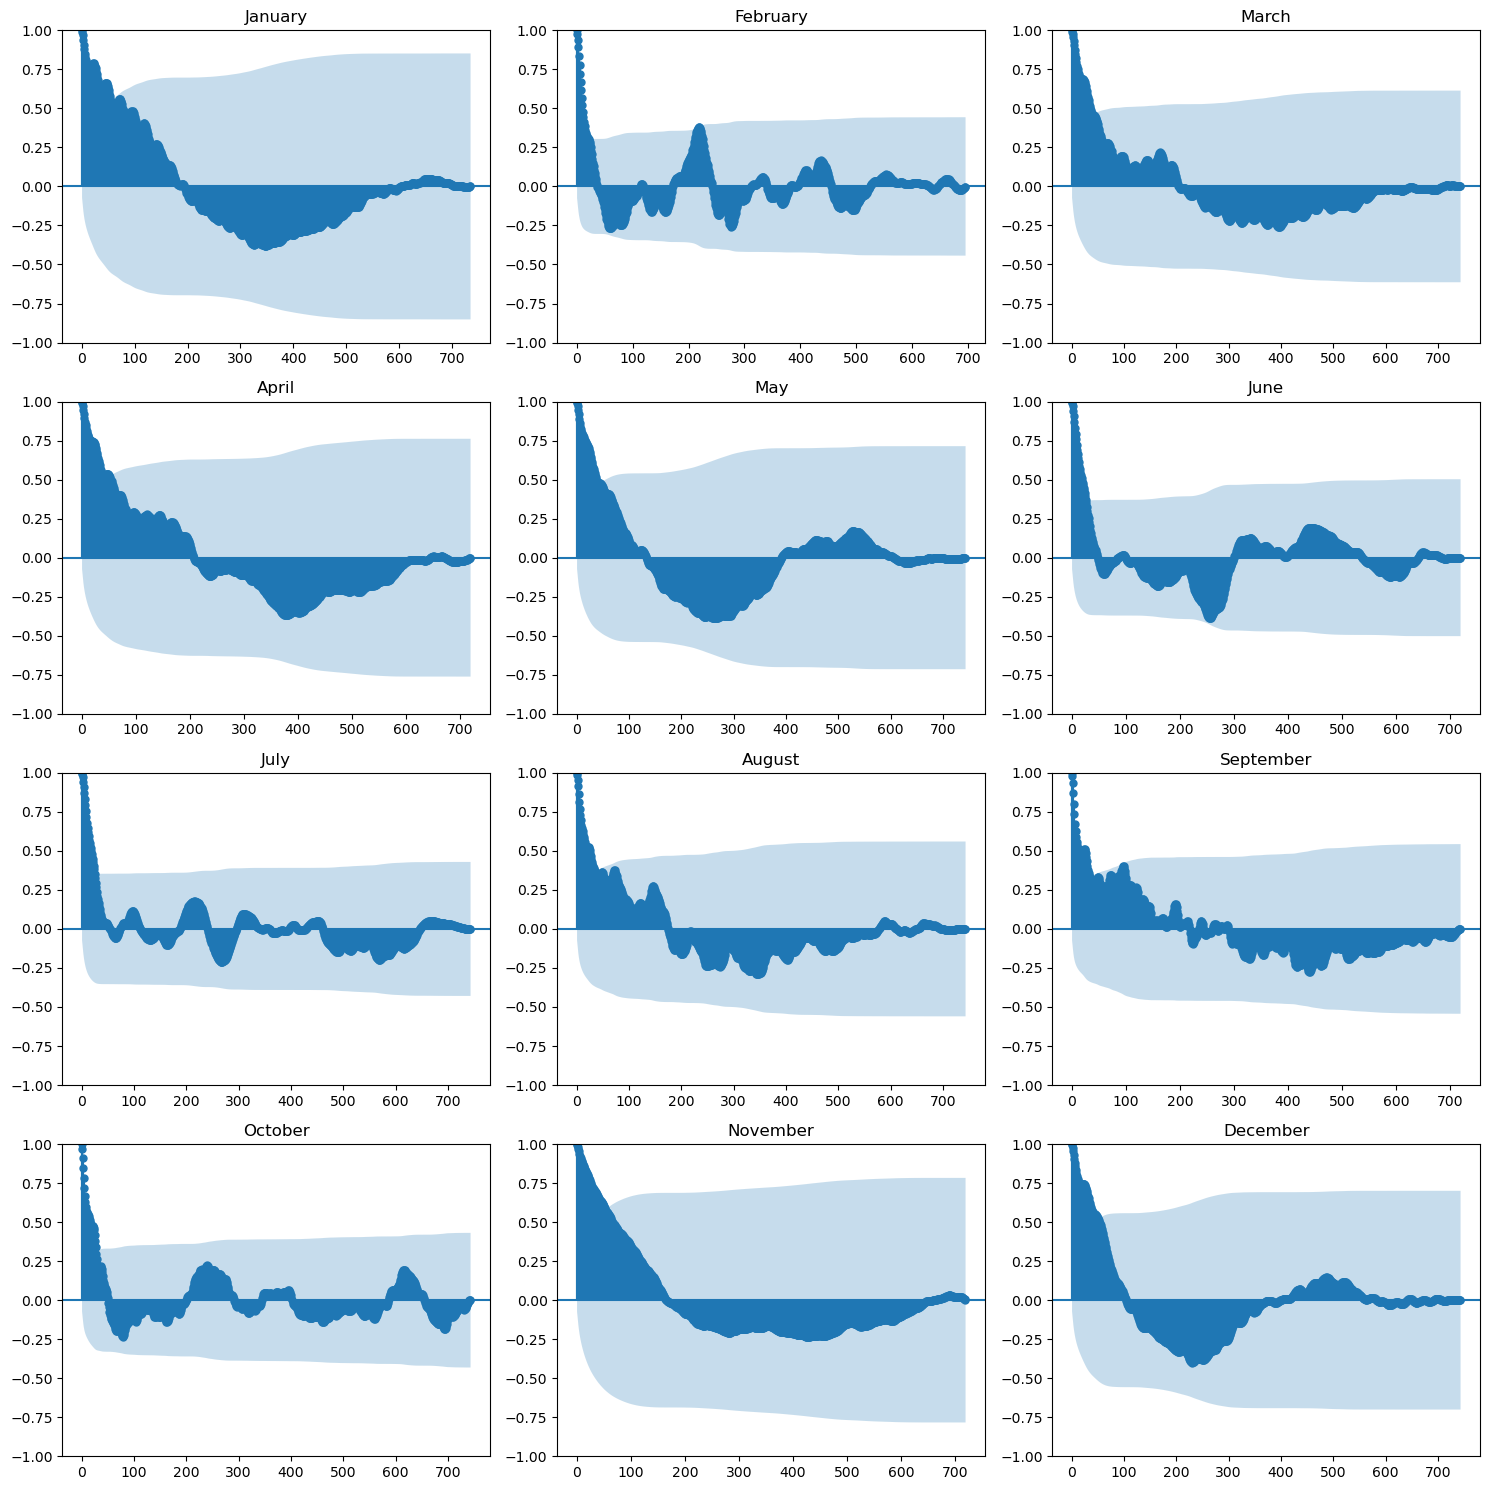

In [26]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data_frames = [january_df, february_df, march_df, april_df, may_df, june_df, july_df, august_df, september_df, october_df, november_df, december_df]

for i, (month, df) in enumerate(zip(months, data_frames)):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    plot_acf(df['v`_100m'], lags=range(0, len(df)), ax=ax)
    ax.set_title(month)

plt.tight_layout()
plt.show()

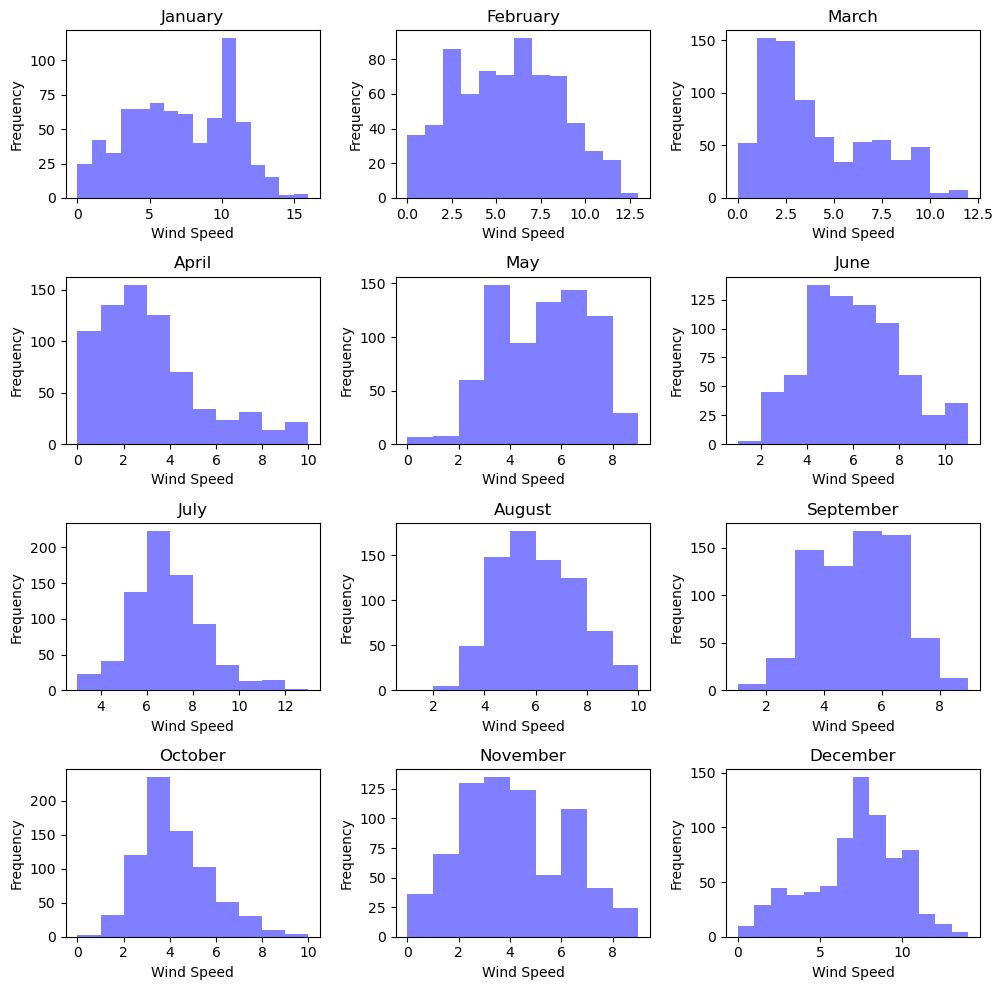

In [27]:

fig, axs = plt.subplots(4, 3, figsize=(10, 10))

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data_frames = [january_df, february_df, march_df, april_df, may_df, june_df, july_df, august_df, september_df, october_df, november_df, december_df]

for i, (month, df) in enumerate(zip(months, data_frames)):
    row = i // 3
    col = i % 3
    axs[row, col].hist(df['M(m/s)_100m'], bins=np.arange(math.floor(min(df['M(m/s)_100m'])), math.ceil(max(df['M(m/s)_100m'])) + 1, 1), alpha=0.5, color='blue')
    axs[row, col].set_title(month)
    axs[row, col].set_xlabel('Wind Speed')
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

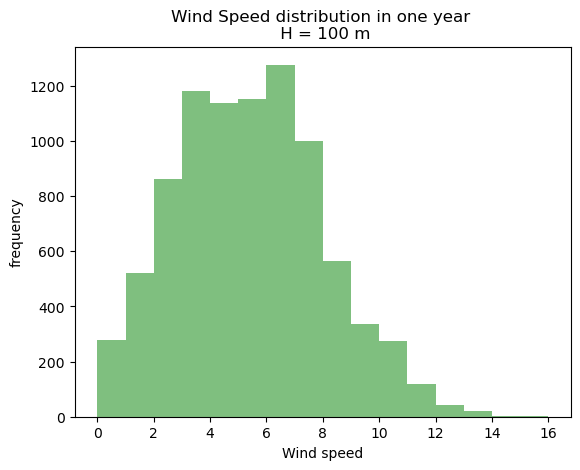

In [28]:
plt.hist(coba_dataframe['M(m/s)_100m'], bins=np.arange(math.floor(min(coba_dataframe['M(m/s)_100m'])), math.ceil(max(coba_dataframe['M(m/s)_100m'])) + 1, 1), alpha=0.5, color='green')
plt.title("Wind Speed distribution in one year \n H = 100 m")
plt.xlabel("Wind speed")
plt.ylabel('frequency')
plt.show()

In [29]:
hist, bin_edges = np.histogram(coba_dataframe['M(m/s)_100m'], bins=np.arange(17), range=range(0, 17), density=True)

wind_speed_histogram_dict = {'wind speed (m/s)': bin_edges[:-1] + 0.5, 'Probability': hist}
wind_speed_histogram_df = pd.DataFrame.from_dict(wind_speed_histogram_dict)
wind_speed_histogram_df


,wind speed (m/s),Probability
0,0.5,0.031677
1,1.5,0.059366
2,2.5,0.098336
3,3.5,0.134458
4,4.5,0.129672
5,5.5,0.131381
6,6.5,0.145510
7,7.5,0.114175
8,8.5,0.064494
9,9.5,0.038400


In [30]:
turbine_df = pd.read_csv(r"gamesa turbine G128_4500 power curve.csv")
turbine_df

,wind speed (m/s),power(kW)
0,0.0,0
1,0.5,0
2,1.0,0
3,1.5,0
4,2.0,75
...,...,...
66,33.0,0
67,33.5,0
68,34.0,0
69,34.5,0


In [31]:
modified_turbine_df = turbine_df.merge(wind_speed_histogram_df, how='left', on='wind speed (m/s)').fillna(0)
modified_turbine_df 

,wind speed (m/s),power(kW),Probability
0,0.0,0,0.000000
1,0.5,0,0.031677
2,1.0,0,0.000000
3,1.5,0,0.059366
4,2.0,75,0.000000
...,...,...,...
66,33.0,0,0.000000
67,33.5,0,0.000000
68,34.0,0,0.000000
69,34.5,0,0.000000


In [32]:
modified_turbine_df['Energy Generated(kWh)'] = modified_turbine_df['power(kW)'] * modified_turbine_df['Probability'] * 366 * 24
modified_turbine_df

,wind speed (m/s),power(kW),Probability,Energy Generated(kWh)
0,0.0,0,0.000000,0.0
1,0.5,0,0.031677,0.0
2,1.0,0,0.000000,0.0
3,1.5,0,0.059366,0.0
4,2.0,75,0.000000,0.0
...,...,...,...,...
66,33.0,0,0.000000,0.0
67,33.5,0,0.000000,0.0
68,34.0,0,0.000000,0.0
69,34.5,0,0.000000,0.0


In [33]:
modified_turbine_df['Energy Generated(kWh)'].sum()

9838039.96353692

In [34]:
# Create an interpolation function from the power curve
interp_func = interp1d(modified_turbine_df['wind speed (m/s)'], modified_turbine_df['power(kW)'], kind='linear', fill_value='extrapolate')

# Merge the two DataFrames based on the key value M(m/s)_100m
merged_df = coba_dataframe.reset_index().merge(modified_turbine_df, left_on='M(m/s)_100m', right_on='wind speed (m/s)', how='left')

# Apply interpolation to fill missing values in the power column
merged_df['power(kW)'] = merged_df.apply(lambda row: interp_func(row['M(m/s)_100m']) if pd.isnull(row['power(kW)']) else row['power(kW)'], axis=1)

# Drop the unnecessary columns from the merged DataFrame
merged_df = merged_df.drop(columns=['wind speed (m/s)'])
merged_df = merged_df.set_index(['YYYYMMDD', 'HHMM'])

# Print the final merged DataFrame
print(merged_df['power(kW)'])

YYYYMMDD    HHMM
2020-01-01  8                   1193.4
            9                   1080.2
            10      1023.5999999999998
            11       884.1999999999999
            12                   760.0
                           ...        
2020-12-31  19                     0.0
            20                    84.0
            21                   111.0
            22                   156.0
            23      191.00000000000003
Name: power(kW), Length: 8776, dtype: object


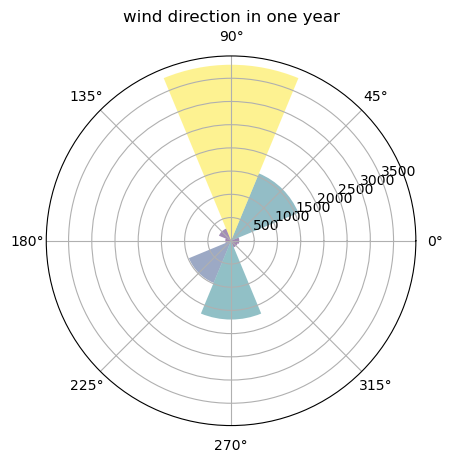

In [35]:
wind_direction_data = np.radians(coba_dataframe['D(deg)_100m'])

# Define the number of sectors (direction intervals)
num_sectors = 8

# Calculate the histogram of wind direction data with 8 bins
hist, bin_edges = np.histogram(wind_direction_data, bins=num_sectors, range=(0, 2*np.pi))

# Calculate the frequencies (radii) for each sector
radii = hist

# Generate theta values for the sectors
theta = np.linspace(0.0, 2 * np.pi, num_sectors, endpoint=False)

# Create the polar plot
ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=np.pi/4, bottom=0.0)
ax.set_title('wind direction in one year')

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r / max(radii)))
    bar.set_alpha(0.5)

plt.show()

In [36]:
def showPolarPlot_n(df, num_sectors, subplot_index, title):
    wind_direction_data = np.radians(df['D(deg)_100m'])

    # Calculate the histogram of wind direction data with 8 bins
    hist, bin_edges = np.histogram(wind_direction_data, bins=num_sectors, range=(0, 2*np.pi))

    # Calculate the frequencies (radii) for each sector
    radii = hist

    # Generate theta values for the sectors
    theta = np.linspace(0.0, 2 * np.pi, num_sectors, endpoint=False)

    # Create the polar plot
    ax = plt.subplot(4, 3, subplot_index, projection='polar')
    bars = ax.bar(theta, radii, width=np.pi/4, bottom=0.0)

    # Use custom colors and opacity
    for r, bar in zip(radii, bars):
        bar.set_facecolor(plt.cm.viridis(r / max(radii)))
        bar.set_alpha(0.5)
    
    ax.set_title(title)

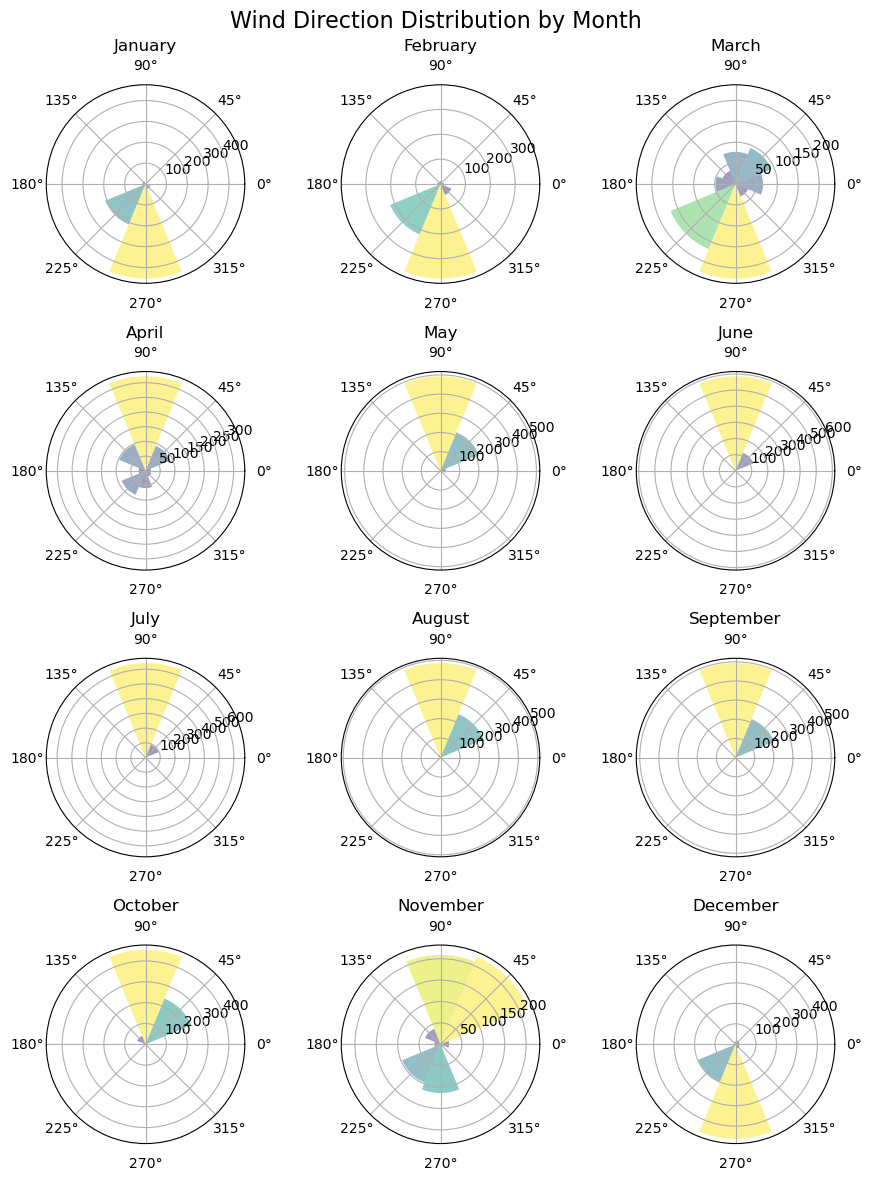

In [37]:
plt.figure(figsize=(9, 12))

showPolarPlot_n(january_df, 8, 1, 'January')
showPolarPlot_n(february_df, 8, 2, 'February')
showPolarPlot_n(march_df, 8, 3, 'March')
showPolarPlot_n(april_df, 8, 4, 'April')
showPolarPlot_n(may_df, 8, 5, 'May')
showPolarPlot_n(june_df, 8, 6, 'June')
showPolarPlot_n(july_df, 8, 7, 'July')
showPolarPlot_n(august_df, 8, 8, 'August')
showPolarPlot_n(september_df, 8, 9, 'September')
showPolarPlot_n(october_df, 8, 10, 'October')
showPolarPlot_n(november_df, 8, 11, 'November')
showPolarPlot_n(december_df, 8, 12, 'December')

plt.suptitle("Wind Direction Distribution by Month", fontsize=16)

plt.tight_layout()
plt.show()

In [38]:
# wind speed profile

coba_dataframe['u*_10m'] = coba_dataframe['M(m/s)_10m'] * k / np.log(z2/zo)
coba_dataframe['psi_100m'] = coba_dataframe['u*_10m'] / k * np.log(z4/zo) - coba_dataframe['M(m/s)_100m']
coba_dataframe

M(m/s)_100m  D(deg)_100m  M(m/s)_50m  D(deg)_50m  M(m/s)_10m  \
YYYYMMDD   HHMM                                                                 
2020-01-01 8             6.4          281         5.9         281         4.3   
           9             6.2          279         5.9         279         4.4   
           10            6.1          279         5.8         278         4.4   
           11            5.8          278         5.5         278         4.2   
           12            5.5          277         5.3         277         4.1   
...                      ...          ...         ...         ...         ...   
2020-12-31 19            1.2          220         0.8         211         0.4   
           20            2.1          235         1.8         233         0.9   
           21            2.4          242         1.9         237         1.0   
           22            2.9          254         2.4         254         1.2   
           23            3.2          263         2.9         264         1.6   

                 D(deg)_10m  M(m/s)_2m  D(deg)_2m    u_100m    v_100m  w_100m  \
YYYYMMDD   HHMM                                                                 
2020-01-01 8            280        5.1      262.0  1.221178 -6.282414       0   
           9            278        5.1      263.0  0.969894 -6.123668       0   
           10           277        5.3      263.0  0.954250 -6.024899       0   
           11           276        5.5      263.0  0.807204 -5.743555       0   
           12           276        5.8      265.0  0.670281 -5.459004       0   
...                     ...        ...        ...       ...       ...     ...   
2020-12-31 19           173        1.0      227.0 -0.919253 -0.771345       0   
           20           234        1.0      210.0 -1.204511 -1.720219       0   
           21           243        1.1      199.0 -1.126732 -2.119074       0   
           22           269        1.2      201.0 -0.799348 -2.787659       0   
           23           283        1.5      209.0 -0.389982 -3.176148       0   

                   u*_10m  psi_100m  
YYYYMMDD   HHMM                      
2020-01-01 8     0.906637  3.119025  
           9     0.927722  3.540397  
           10    0.927722  3.640397  
           11    0.885553  3.497652  
           12    0.864468  3.576279  
...                   ...       ...  
2020-12-31 19    0.084338 -0.314509  
           20    0.189761 -0.107646  
           21    0.210846 -0.186273  
           22    0.253015 -0.243528  
           23    0.337353  0.341963  

[8776 rows x 13 columns]

In [39]:
coba_dataframe.to_csv('raw data.csv')